# Производная √x через площадь квадрата

## 🎯 ПРАВИЛЬНЫЕ обозначения:

Квадрат:
- **x = сторона** (независимая переменная, то что задаём)
- **y = площадь = x²** (функция, то что получается)

**План:**
1. Сначала найдём $\frac{dy}{dx}$ (как площадь меняется при изменении стороны)
2. Потом из этого получим производную корня: $\frac{d\sqrt{t}}{dt}$


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12


---

## Часть 1: Прямая функция y = x²

### Геометрия:

- **x** = сторона квадрата (см)
- **y** = площадь квадрата = $x^2$ (см²)

**Пример:** Сторона 3 см → Площадь 9 см²


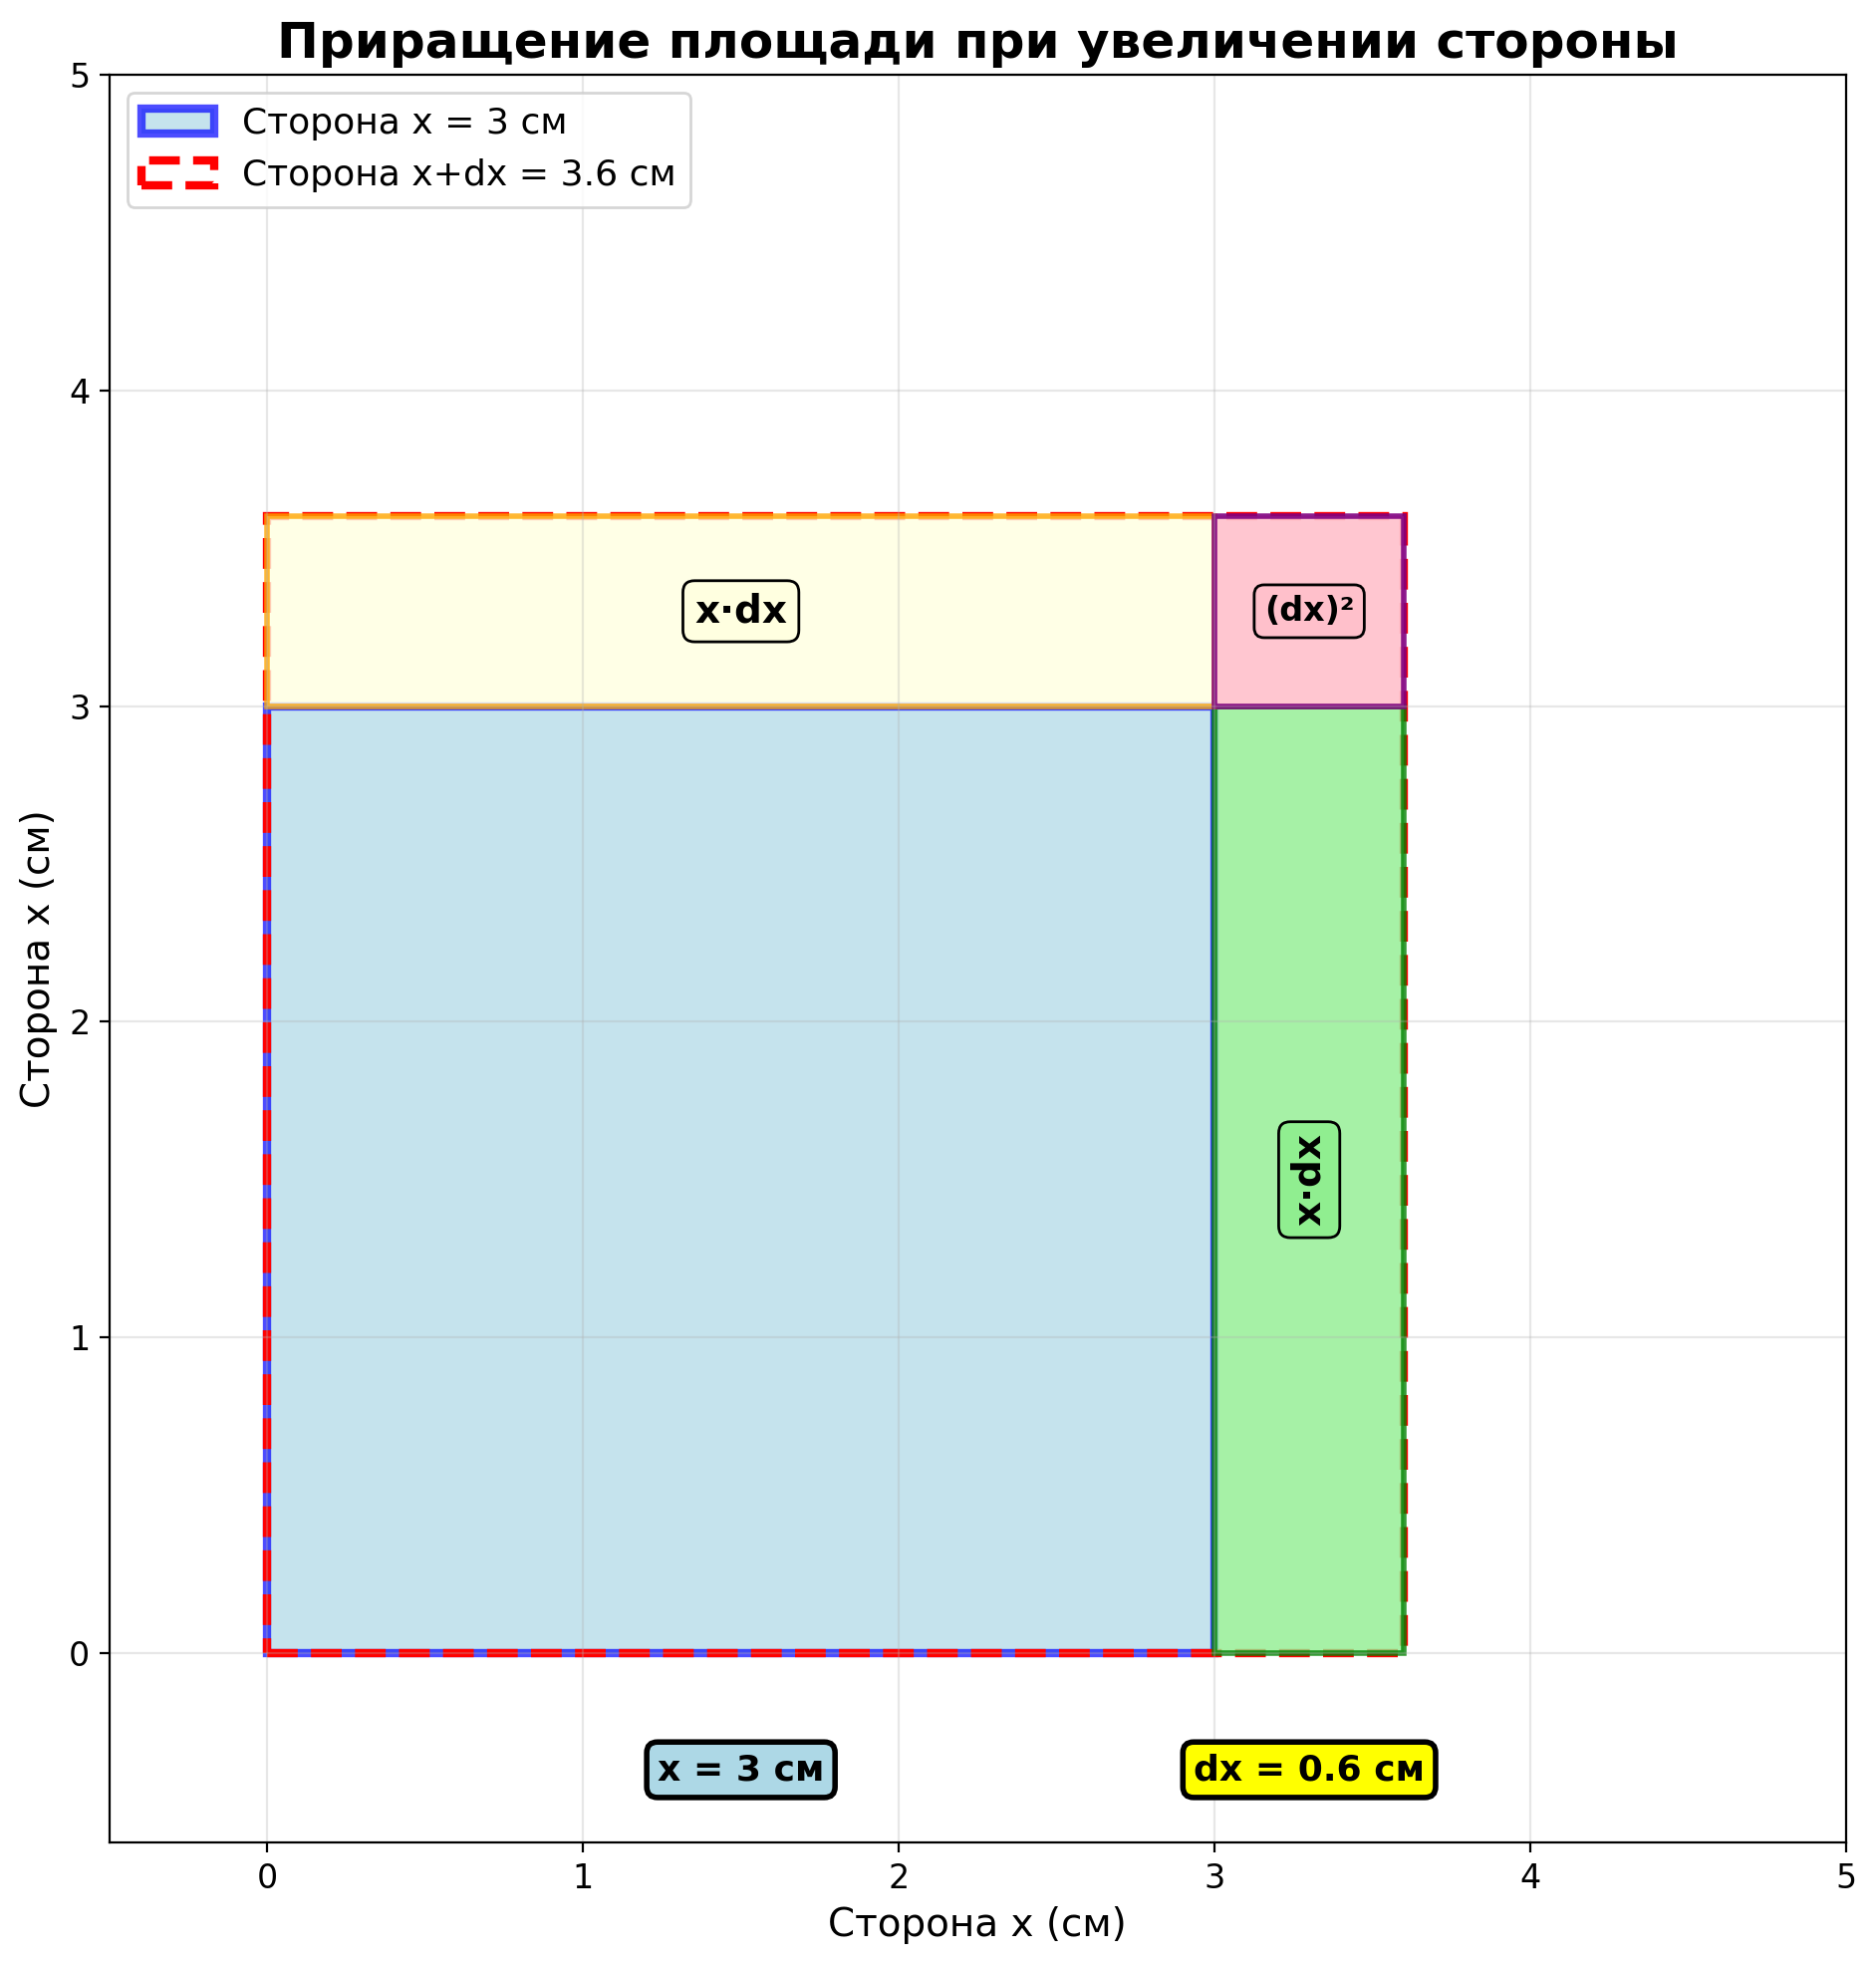

ЧТО ДОБАВИЛОСЬ К ПЛОЩАДИ:

Старая площадь: y = x² = 3² = 9 см²
Новая площадь: (x+dx)² = (3+0.6)² = 12.96 см²

Приращение площади: dy = 12.96 - 9 = 3.96 см²

Из чего состоит dy:
  🟢🟠 Две полоски:   2x·dx = 2×3×0.6 = 3.60 см²
  🟣 Угловой квадрат: (dx)² = 0.6² = 0.36 см²

  Сумма: 3.60 + 0.36 = 3.96 см²

✓ Формула: dy = 2x·dx + (dx)²



In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Исходный квадрат
x_val = 3  # сторона
y_val = x_val**2  # площадь
dx_val = 0.6  # приращение стороны

# Старый квадрат
square_old = Rectangle((0, 0), x_val, x_val, linewidth=3, edgecolor='blue', 
                        facecolor='lightblue', alpha=0.7, label=f'Сторона x = {x_val} см')
ax.add_patch(square_old)

# Новый квадрат (контур)
square_new = Rectangle((0, 0), x_val + dx_val, x_val + dx_val, linewidth=3, edgecolor='red', 
                        facecolor='none', linestyle='--', label=f'Сторона x+dx = {x_val + dx_val} см')
ax.add_patch(square_new)

# Правая полоска
rect_right = Rectangle((x_val, 0), dx_val, x_val, linewidth=2, edgecolor='green', 
                        facecolor='lightgreen', alpha=0.8)
ax.add_patch(rect_right)
ax.text(x_val + dx_val/2, x_val/2, 'x·dx', fontsize=14, ha='center', va='center', 
        fontweight='bold', rotation=90, bbox=dict(boxstyle='round', facecolor='lightgreen'))

# Верхняя полоска
rect_top = Rectangle((0, x_val), x_val, dx_val, linewidth=2, edgecolor='orange', 
                      facecolor='lightyellow', alpha=0.8)
ax.add_patch(rect_top)
ax.text(x_val/2, x_val + dx_val/2, 'x·dx', fontsize=14, ha='center', va='center', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightyellow'))

# Угловой квадратик
square_corner = Rectangle((x_val, x_val), dx_val, dx_val, linewidth=2, edgecolor='purple', 
                          facecolor='pink', alpha=0.9)
ax.add_patch(square_corner)
ax.text(x_val + dx_val/2, x_val + dx_val/2, '(dx)²', fontsize=12, ha='center', va='center', 
        fontweight='bold', bbox=dict(boxstyle='round', facecolor='pink'))

# Подписи
ax.text(x_val/2, -0.4, f'x = {x_val} см', fontsize=13, ha='center', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightblue', linewidth=2))
ax.text(x_val + dx_val/2, -0.4, f'dx = {dx_val} см', fontsize=13, ha='center', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', linewidth=2))

ax.set_xlim(-0.5, 5)
ax.set_ylim(-0.6, 5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_title('Приращение площади при увеличении стороны', fontsize=18, fontweight='bold')
ax.set_xlabel('Сторона x (см)', fontsize=14)
ax.set_ylabel('Сторона x (см)', fontsize=14)
ax.legend(fontsize=13, loc='upper left')

plt.tight_layout()
plt.show()

# Расчеты
dy_val = (x_val + dx_val)**2 - x_val**2
area_strips = 2 * x_val * dx_val
area_corner = dx_val**2

print("="*70)
print("ЧТО ДОБАВИЛОСЬ К ПЛОЩАДИ:")
print("="*70)
print()
print(f"Старая площадь: y = x² = {x_val}² = {y_val} см²")
print(f"Новая площадь: (x+dx)² = ({x_val}+{dx_val})² = {(x_val+dx_val)**2:.2f} см²")
print()
print(f"Приращение площади: dy = {(x_val+dx_val)**2:.2f} - {y_val} = {dy_val:.2f} см²")
print()
print("Из чего состоит dy:")
print(f"  🟢🟠 Две полоски:   2x·dx = 2×{x_val}×{dx_val} = {area_strips:.2f} см²")
print(f"  🟣 Угловой квадрат: (dx)² = {dx_val}² = {area_corner:.2f} см²")
print()
print(f"  Сумма: {area_strips:.2f} + {area_corner:.2f} = {area_strips + area_corner:.2f} см²")
print()
print("✓ Формула: dy = 2x·dx + (dx)²")
print()
print("="*70)


---

## Производная y = x²

Увеличиваем сторону: $x \to x + dx$

Площадь увеличивается: $y \to y + dy$

Новая площадь:
$$(x + dx)^2 = x^2 + 2x \cdot dx + (dx)^2$$

Приращение:
$$dy = (x+dx)^2 - x^2 = 2x \cdot dx + (dx)^2$$

При малых $dx$ член $(dx)^2$ пренебрежимо мал:
$$dy \approx 2x \cdot dx$$

Производная:
$$\frac{dy}{dx} = 2x$$

### ✅ Итог:

$$\boxed{\frac{d(x^2)}{dx} = 2x}$$

**Геометрический смысл:** Две полоски площадью $x \cdot dx$ каждая = $2x \cdot dx$


---

## Часть 2: Обратная функция x = √y

**Задача:** Дана площадь $y$. Найти сторону $x$.

**Решение:** $x = \sqrt{y}$

**Вопрос:** Как найти $\frac{dx}{dy}$ (как сторона меняется при изменении площади)?

---

### Метод: Обратная производная

Мы знаем: $\frac{dy}{dx} = 2x$

По правилу обратной функции:
$$\frac{dx}{dy} = \frac{1}{\frac{dy}{dx}} = \frac{1}{2x}$$

Но $x = \sqrt{y}$, поэтому:
$$\frac{dx}{dy} = \frac{1}{2\sqrt{y}}$$


---

## Часть 3: Производная √t

Теперь переобозначим переменные для стандартной записи функции.

Пусть $t$ = площадь, $f(t) = \sqrt{t}$ = сторона.

Производная:
$$f'(t) = \frac{d\sqrt{t}}{dt} = \frac{1}{2\sqrt{t}}$$

### ✅ Финальная формула:

$$\boxed{\frac{d\sqrt{x}}{dx} = \frac{1}{2\sqrt{x}}}$$

(здесь $x$ — просто переменная, аргумент функции корня)


In [28]:
# Численная проверка

# Прямая функция y = x²
x_test = 3
y_test = x_test**2
dx_test = 0.01

# Новое значение
x_new = x_test + dx_test
y_new = x_new**2
dy_actual = y_new - y_test

# Производная y = x²
derivative_forward = dy_actual / dx_test
derivative_forward_exact = 2 * x_test

print("="*70)
print("ПРОВЕРКА 1: Производная y = x²")
print("="*70)
print()
print(f"Сторона: x = {x_test} см")
print(f"Площадь: y = x² = {y_test} см²")
print()
print(f"Сторона увеличилась на dx = {dx_test} см")
print(f"Новая сторона: x+dx = {x_new} см")
print()
print(f"Новая площадь: (x+dx)² = {y_new:.8f} см²")
print(f"Площадь увеличилась на dy = {dy_actual:.8f} см²")
print()
print("─" * 70)
print("Производная dy/dx:")
print("─" * 70)
print()
print(f"  Численно:   dy/dx ≈ {dy_actual:.8f}/{dx_test} = {derivative_forward:.8f}")
print(f"  По формуле: dy/dx = 2x = 2×{x_test} = {derivative_forward_exact:.8f}")
print()
print(f"  Разница: {abs(derivative_forward - derivative_forward_exact):.10f}")
print()
print("✓ Формула dy/dx = 2x работает!")
print()
print("="*70)
print()

# Обратная функция x = √y
y_test2 = 9  # площадь
x_test2 = np.sqrt(y_test2)  # сторона
dy_test = 0.01

# Новое значение
y_new2 = y_test2 + dy_test
x_new2 = np.sqrt(y_new2)
dx_actual = x_new2 - x_test2

# Производная x = √y
derivative_inverse = dx_actual / dy_test
derivative_inverse_exact = 1 / (2 * x_test2)

print("="*70)
print("ПРОВЕРКА 2: Производная x = √y")
print("="*70)
print()
print(f"Площадь: y = {y_test2} см²")
print(f"Сторона: x = √y = {x_test2} см")
print()
print(f"Площадь увеличилась на dy = {dy_test} см²")
print(f"Новая площадь: y+dy = {y_new2} см²")
print()
print(f"Новая сторона: √(y+dy) = {x_new2:.8f} см")
print(f"Сторона увеличилась на dx = {dx_actual:.8f} см")
print()
print("─" * 70)
print("Производная dx/dy:")
print("─" * 70)
print()
print(f"  Численно:   dx/dy ≈ {dx_actual:.8f}/{dy_test} = {derivative_inverse:.8f}")
print(f"  По формуле: dx/dy = 1/(2x) = 1/(2×{x_test2}) = {derivative_inverse_exact:.8f}")
print()
print(f"  Разница: {abs(derivative_inverse - derivative_inverse_exact):.10f}")
print()
print("✓ Формула dx/dy = 1/(2√y) работает!")
print()
print("="*70)


ПРОВЕРКА 1: Производная y = x²

Сторона: x = 3 см
Площадь: y = x² = 9 см²

Сторона увеличилась на dx = 0.01 см
Новая сторона: x+dx = 3.01 см

Новая площадь: (x+dx)² = 9.06010000 см²
Площадь увеличилась на dy = 0.06010000 см²

──────────────────────────────────────────────────────────────────────
Производная dy/dx:
──────────────────────────────────────────────────────────────────────

  Численно:   dy/dx ≈ 0.06010000/0.01 = 6.01000000
  По формуле: dy/dx = 2x = 2×3 = 6.00000000

  Разница: 0.0100000000

✓ Формула dy/dx = 2x работает!


ПРОВЕРКА 2: Производная x = √y

Площадь: y = 9 см²
Сторона: x = √y = 3.0 см

Площадь увеличилась на dy = 0.01 см²
Новая площадь: y+dy = 9.01 см²

Новая сторона: √(y+dy) = 3.00166620 см
Сторона увеличилась на dx = 0.00166620 см

──────────────────────────────────────────────────────────────────────
Производная dx/dy:
──────────────────────────────────────────────────────────────────────

  Численно:   dx/dy ≈ 0.00166620/0.01 = 0.16662040
  По формуле: dx/

---

## 📋 Резюме

### 🎯 Правильные обозначения для квадрата:

- **x = сторона** (независимая переменная)
- **y = площадь = x²** (функция)

---

### Прямая функция: y = x²

**Геометрия:** При увеличении стороны на $dx$ к квадрату добавляются:
- Две полоски площадью $x \cdot dx$ каждая
- Угловой квадрат площадью $(dx)^2$

**Приращение площади:**
$$dy = 2x \cdot dx + (dx)^2 \approx 2x \cdot dx$$

**Производная:**
$$\boxed{\frac{dy}{dx} = \frac{d(x^2)}{dx} = 2x}$$

---

### Обратная функция: x = √y

**Задача:** Дана площадь $y$, найти сторону $x = \sqrt{y}$

**Производная (по правилу обратной функции):**
$$\frac{dx}{dy} = \frac{1}{\frac{dy}{dx}} = \frac{1}{2x} = \frac{1}{2\sqrt{y}}$$

---

### Производная корня:

$$\boxed{\frac{d\sqrt{t}}{dt} = \frac{1}{2\sqrt{t}}}$$

(где $t$ — аргумент функции)

---

### 💡 Главное:

**Для квадрата естественная функция — это ПЛОЩАДЬ от СТОРОНЫ:** $y = x^2$

**Корень — это ОБРАТНАЯ функция:** сторона от площади
